Welcome to today's lab!  

The main priority today will be to introduce ourselves to the SciKit learn API and fit a decision tree on a dataset and understand its main points.  

Today's lab will lay a foundation for working with more sophisticated models that represent the edge of machine learning.

**Step 1:**  Load in the file `housing.csv`

In [85]:
import pandas as pd
import numpy as np

In [86]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [87]:
# your code here
from sklearn.tree import DecisionTreeRegressor

In [88]:
# your code here
df = pd.read_csv(r'/Users/lauverm/dat-11-15/Homework/Unit2/data/housing.csv')

**Step 2:** Declare `X` & `y`

`y` is the `PRICE` column, and `X` is every numeric column except `PRICE`.

In [89]:
# your code here
x = df.iloc[:,:-1]
y = df['PRICE']

**Step 3:** Initialize a `DecisionTreeRegressor` with a `max_depth` of 3, and fit it on `X` and `y`

In [90]:
tree = DecisionTreeRegressor(max_depth = 3)

**Step 4:** Call `plot_tree` to visualize the results

In [91]:
# your code here
tree.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [92]:
y.mean()

22.532806324110698

In [93]:
y.shape

(506,)

In [94]:
#mean squared error (reducing average error)

np.mean((y - y.mean())**2)

84.4195561561656

In [95]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
# why 6.941

In [96]:
df['CHAS'].unique()

array([0, 1])

In [97]:
left_side = df[df['RM'] <= 6.94]
right_side = df[df['RM'] > 6.94]

In [98]:
left_mse = np.mean((y[left_side.index].mean()-y[left_side.index])**2)

In [99]:
right_mse = np.mean((y[right_side.index].mean()-y[right_side.index])**2)

In [100]:
left_mse

40.272839643050304

In [101]:
right_mse

79.7292018698061

In [102]:
left_weight = left_side.shape[0] / y.shape[0]

In [103]:
right_weight = right_side.shape[0] / y.shape[0]

In [104]:
left_weight

0.849802371541502

In [105]:
root_mse = (left_weight + left_mse) + (right_weight + right_mse)

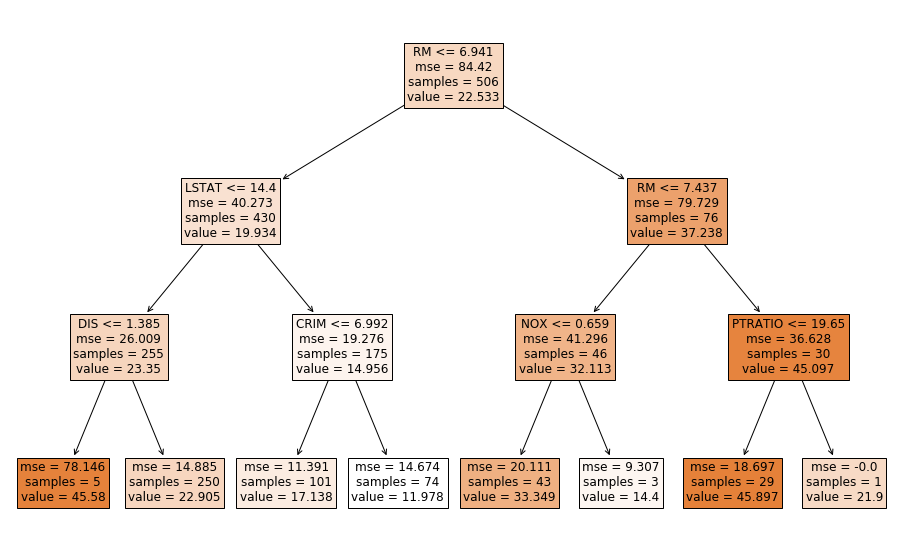

In [106]:
plt.figure(figsize=(16,10))
plot_tree(tree,filled=True, fontsize=12, feature_names = x.columns);

In [ ]:
# decision tree takes everything on leaf and predicts average value

**Step 5:** Call the `predict` method on your original dataset.  Look at the results, and make sure you can make sense out of them/

In [107]:
# your code here
df['predict'] = tree.predict(x)

In [108]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,predict
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,22.905200
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.905200
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.348837
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.348837
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,33.348837


In [109]:
sample = np.array([[0.45, 24,5.65,1,0.449, 7.3, 79, 6.5,4, 400,39,450, 15]])

In [110]:
tree.predict(sample)

array([33.34883721])

**Step 6:** call the `score` method on your model, and pass in `X` and `y` as arguments.  We'll talk about the results of this after the lab

In [111]:
# your code here
tree.score(x,y)

0.8177924678036445

**Step 7:** Try changing the following parameters to see what they do.  It might help to draw the tree after you are done fitting to see what has changed.  If you want some guidance you can look at the source page for the scikit-learn decision tree:  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

 - `max_depth`: positive integer.  Set it to `None` if you want the tree to split indefinitely
 - `max_features`: can be a fraction (between 0 and 1) or an integer
 - `min_samples_leaf`: integer or fraction (between 0 and 1)

In [1]:
# your code here


In [112]:
tree = DecisionTreeRegressor(max_depth = None)

In [113]:
# your code here
tree.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

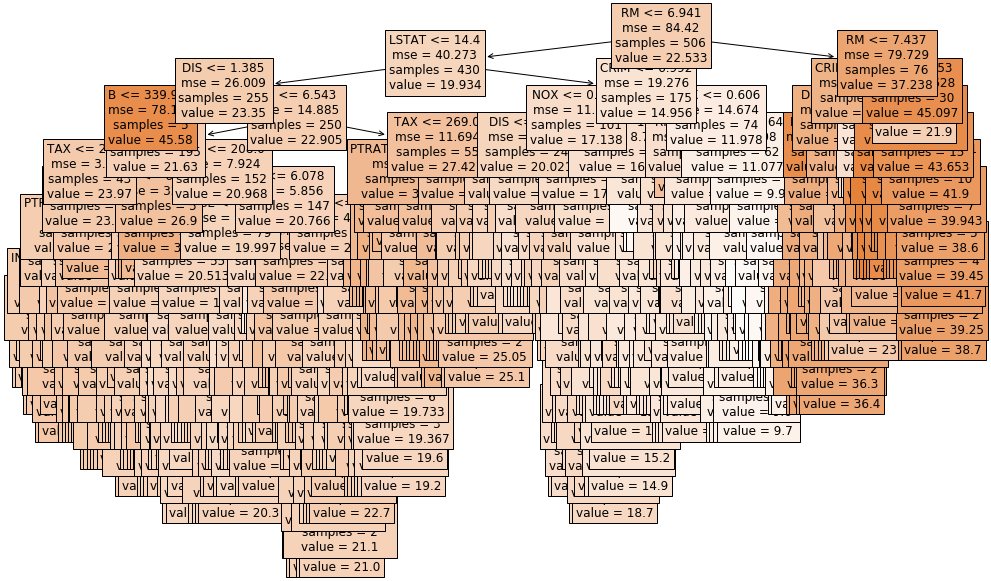

In [114]:
plt.figure(figsize=(16,10))
plot_tree(tree,filled=True, fontsize=12, feature_names = x.columns);

In [145]:
tree = DecisionTreeRegressor(max_depth = 5, max_features=0.3,min_samples_leaf=20)

In [146]:
# your code here
tree.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=0.3,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

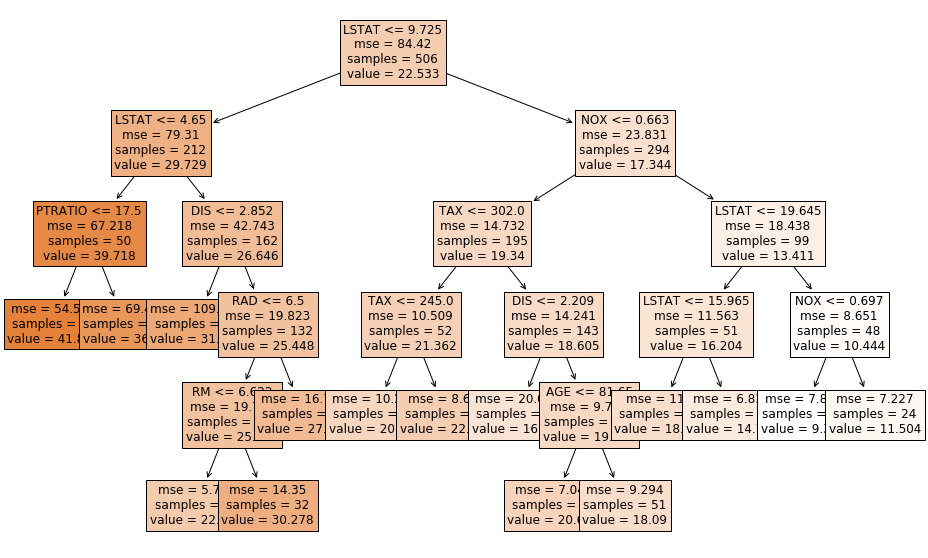

In [147]:
plt.figure(figsize=(16,10))
plot_tree(tree,filled=True, fontsize=12, feature_names = x.columns);

In [148]:
#goodness of fit; r2 value compairison to mse of model and guessing the average 
tree.score(x,y)

0.7534144607658722

In [151]:
naive_error = np.mean((y- y.mean())**2)

In [153]:
mod_error = np.mean((y - tree.predict(x))**2)

In [154]:
mod_error

20.816641776673826

In [156]:
1 - (mod_error / naive_error)

0.7534144607658722

In [157]:
!pip install category_encoders

/bin/sh: pip: command not found
